### 1. Import and read the data

In [1]:
# import the data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
# Checking the count of each country
df.country.value_counts()

Armenia                 1
Mauritania              1
Sudan                   1
Samoa                   1
Australia               1
Philippines             1
Cape Verde              1
United Arab Emirates    1
Myanmar                 1
Uzbekistan              1
Uganda                  1
El Salvador             1
Jamaica                 1
Lithuania               1
Jordan                  1
Iraq                    1
Malawi                  1
Albania                 1
Poland                  1
Serbia                  1
Lao                     1
Ecuador                 1
Chad                    1
Georgia                 1
China                   1
Nepal                   1
Nigeria                 1
Brazil                  1
Cote d'Ivoire           1
Sweden                  1
                       ..
Tajikistan              1
Switzerland             1
Hungary                 1
Israel                  1
Angola                  1
Ukraine                 1
Grenada                 1
Burundi     

In [3]:
# Finding the shape of the data (number of rows and columns)
df.shape

(167, 10)

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# info of the columns like dtypes,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# converting expotrs, imports and health column from percentage values to float
df['exports'] = (df['exports']/100)*df['gdpp']
df['imports']=(df['imports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
# Popping out the country column from the data
y=df.pop('country')

In [9]:
# Finding number of nulls for columns
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 2. Outlier treatment

In [10]:
# finding outliers
df=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


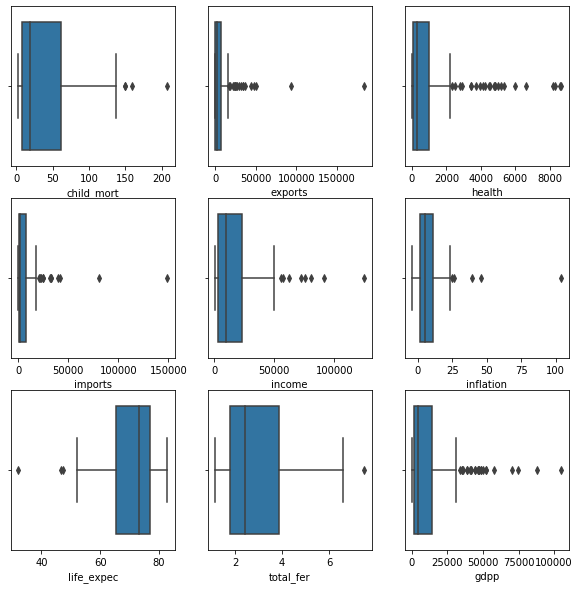

In [11]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

# Treating outliers
q1=df['child_mort'].quantile(0.00)
q4=df['child_mort'].quantile(0.99)
df=df[(df['child_mort']>=q1) & (df['child_mort']<=q4)]

q1=df['inflation'].quantile(0.00)
q4=df['inflation'].quantile(0.90)
df=df[(df['inflation']>=q1) & (df['inflation']<=q4)]

q1=df['life_expec'].quantile(0.01)
q4=df['life_expec'].quantile(0.99)
df=df[(df['life_expec']>=q1) & (df['life_expec']<=q4)]



# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

### 3. Principal Component Analysis (PCA)

In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [13]:
df1[:4,:4]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 ],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254]])

In [14]:
# maximun value
df1.max()

9.839814177922182

In [15]:
# Finding the variance of each column
100*df.var()/sum(df.var())

child_mort    1.300825e-04
exports       2.583863e+01
health        2.595435e-01
imports       1.730847e+01
income        2.972436e+01
inflation     8.937032e-06
life_expec    6.325559e-06
total_fer     1.832947e-07
gdpp          2.686885e+01
dtype: float64

In [16]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [18]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

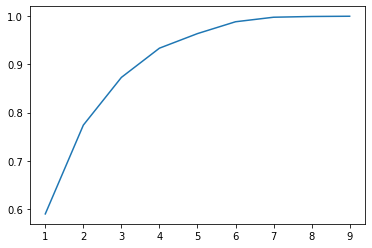

In [19]:
# Plotting the scree plot
var_cumm=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumm)+1,),var_cumm)

In [20]:
# Number of PC'S we can go with are 4 which gives 92% approx..

In [21]:
# performing dimentionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=4)

In [22]:
# Transform the data
df_pca=pca_final.fit_transform(df1)
df_pca.shape

(167, 4)

In [23]:
# Creating a dataframe with PC's obtained
df_pca2=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4'])
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [24]:
# Adding country column to the principal components
df_pca3= pd.concat([df_pca2,y],axis=1)
df_pca3.head()

,PC1,PC2,PC3,PC4,country
0,-2.636647,1.472085,-0.546500,0.237267,Afghanistan
1,-0.023845,-1.435816,-0.009080,-0.442921,Albania
2,-0.459260,-0.678794,0.967852,-0.176389,Algeria
3,-2.723581,2.176018,0.597794,0.438919,Angola
4,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda


In [25]:
df_pca3 = df_pca3[['country', 'PC1', 'PC2', 'PC3', 'PC4']]

In [26]:
df_pca3.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [27]:
df_pca3.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [28]:
# Hopkins statistic
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
# Checking hopkins measure
hopkins(df_pca3.drop('country',axis=1))

0.9422657647577584

In [30]:
# For performing clustering we need to drop the country column
df3 = df_pca3.drop('country', axis = 1)
df3.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


### 4. K-Means Clustering

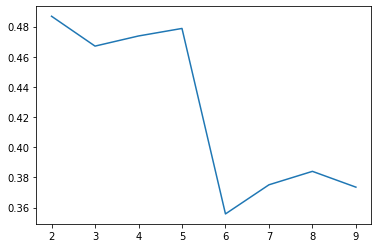

In [31]:
# silhouette score plot
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ss.append([k,silhouette_score(df3,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

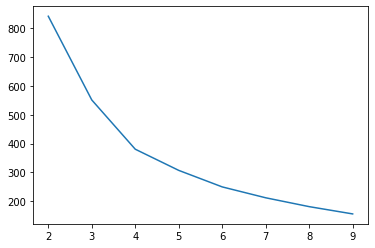

In [32]:
# Elbow curve method
ssd=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ssd.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [33]:
# performing kmeans using k=3
model1_kmean= KMeans(n_clusters=3, random_state=0)
model1_kmean.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
df_pca2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [35]:
# Adding clusterID to the PCs data
data_km=pd.concat([df_pca3.reset_index().drop('index',axis=1),pd.Series(model1_kmean.labels_).reset_index().drop('index',axis=1)],axis=1)
data_km.columns=['country','PC1','PC2','PC3','PC4','ClusterID']
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2


In [36]:
# Checking the count of the clusters that are formed
data_km['ClusterID'].value_counts()

2    91
0    48
1    28
Name: ClusterID, dtype: int64

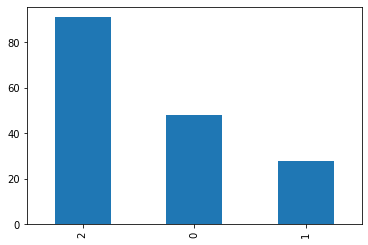

In [37]:
# plotting the bar graph
data_km['ClusterID'].value_counts().plot(kind='bar')

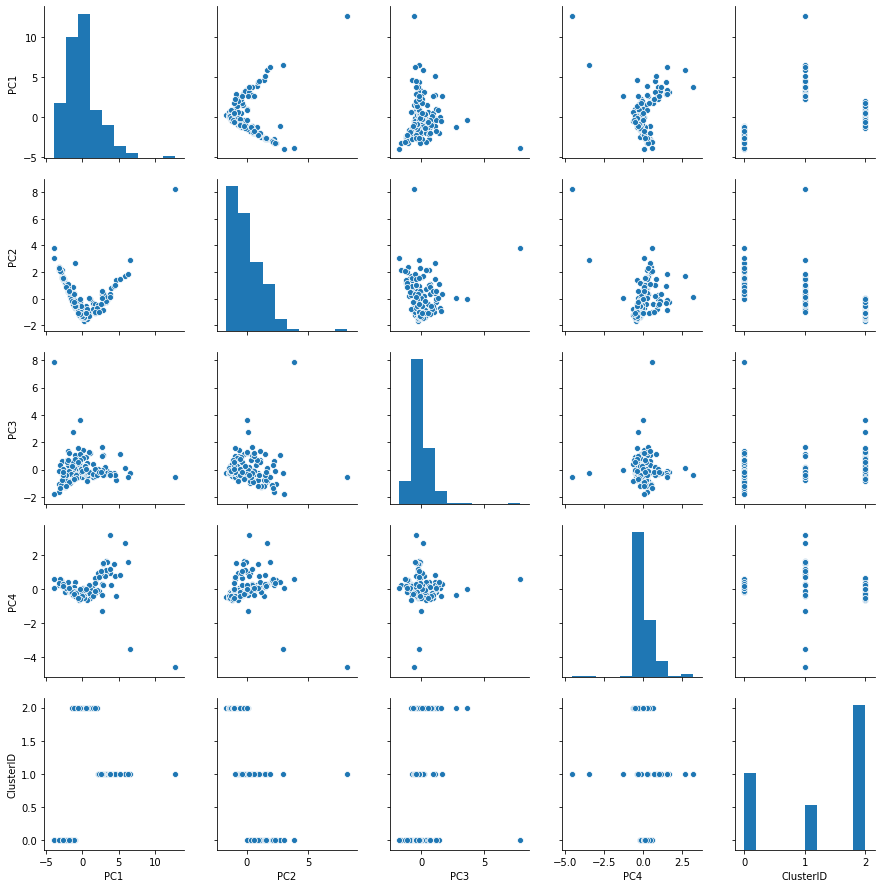

In [38]:
# plotting the clusters with the clusters obtained
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_km)
plt.show()

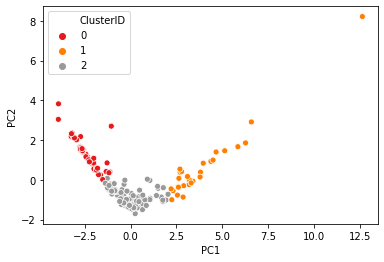

In [39]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=data_km,palette='Set1')

### 5. Cluster profiling K-Means

In [40]:
# Merging with the original data
data1=pd.concat([df,data_km],axis=1)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,PC1,PC2,PC3,PC4,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2


In [41]:
data1=data1.drop(['exports','health','imports','inflation','life_expec','total_fer','PC1','PC2','PC3','PC4'],axis=1)

In [42]:
data1.head()

,child_mort,income,gdpp,country,ClusterID
0,90.2,1610,553,Afghanistan,0
1,16.6,9930,4090,Albania,2
2,27.3,12900,4460,Algeria,2
3,119.0,5900,3530,Angola,0
4,10.3,19100,12200,Antigua and Barbuda,2


In [43]:
data1 = data1[['country', 'child_mort', 'income', 'gdpp', 'ClusterID']]

In [44]:
data1.head()

,country,child_mort,income,gdpp,ClusterID
0,Afghanistan,90.2,1610,553,0
1,Albania,16.6,9930,4090,2
2,Algeria,27.3,12900,4460,2
3,Angola,119.0,5900,3530,0
4,Antigua and Barbuda,10.3,19100,12200,2


### 6. Analysis of the clusters K-Means

In [45]:
data1.drop('country',axis=1).groupby('ClusterID').mean()

,child_mort,income,gdpp
ClusterID,,,
0,91.610417,3897.354167,1909.208333
1,5.046429,50178.571429,48114.285714
2,20.357143,13968.021978,7979.912088


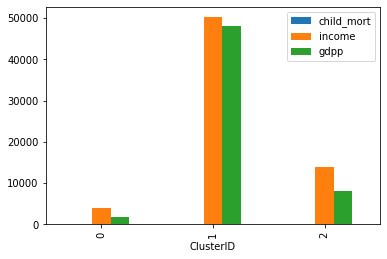

In [46]:
# plotting
data1.drop('country',axis=1).groupby('ClusterID').mean().plot(kind='bar')

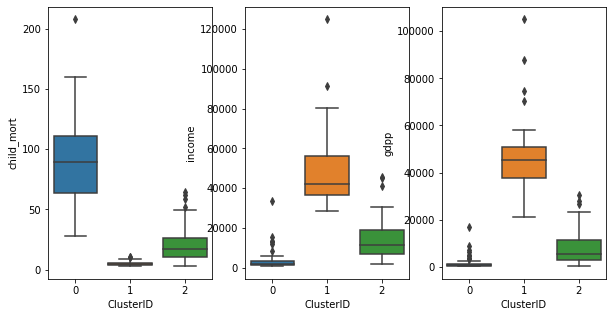

In [47]:
plt.figure(figsize=(10,5))
var=['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='ClusterID',y=i[1],data=data1)

In [48]:
# Concept of binning
data1[data1['ClusterID']==1]['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

### 7. Hierarchical Clustering

In [49]:
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [50]:
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2


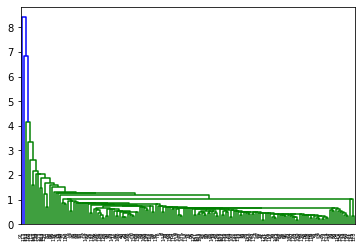

In [72]:
# Single Linkage
mergings=linkage(df1,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

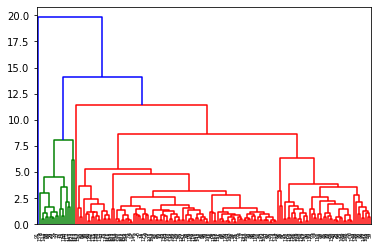

In [73]:
# complete linkage
mergings=linkage(df1,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [74]:
# For 2 clusters
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# Assigning cluster labels
data_km['cluster_labels'] = cluster_labels
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2,0
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2,0
3,Angola,-2.723581,2.176018,0.597794,0.438919,0,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2,0


In [58]:
# Checking the count of the clusters that are formed
data_km['cluster_labels'].value_counts()

0    165
2      1
1      1
Name: cluster_labels, dtype: int64

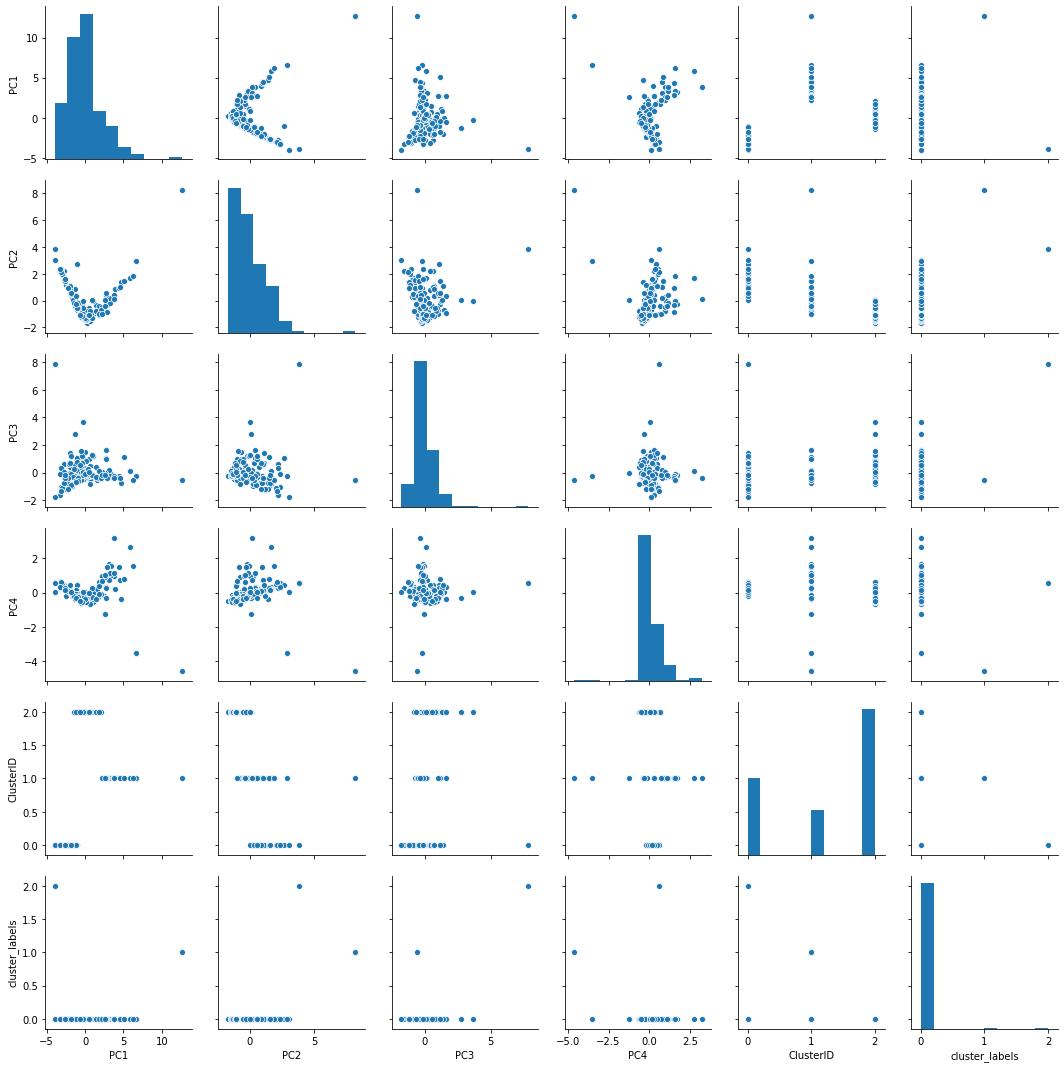

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_km)
plt.show()

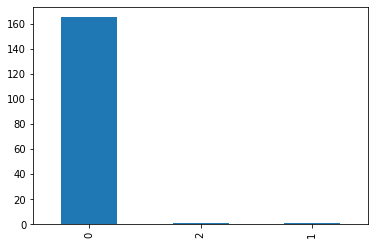

In [60]:
# plotting the bar graph
data_km['cluster_labels'].value_counts().plot(kind='bar')

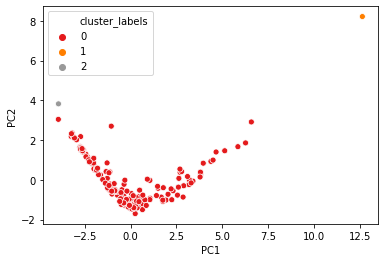

In [61]:
# plotting the clusters with the clusters obtained
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',data=data_km,palette='Set1')

### 8. Cluster profiling Hierarchial clustering

In [62]:
# Merging with the original data
data2=pd.concat([df,data_km],axis=1)

In [63]:
data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.459260,-0.678794,0.967852,-0.176389,2,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,-2.723581,2.176018,0.597794,0.438919,0,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2,0


In [64]:
data2=data2.drop(['exports','health','imports','inflation','life_expec','total_fer','PC1','PC2','PC3','PC4'],axis=1)

In [65]:
data2.head()

,child_mort,income,gdpp,country,ClusterID,cluster_labels
0,90.2,1610,553,Afghanistan,0,0
1,16.6,9930,4090,Albania,2,0
2,27.3,12900,4460,Algeria,2,0
3,119.0,5900,3530,Angola,0,0
4,10.3,19100,12200,Antigua and Barbuda,2,0


In [66]:
data2 = data2[['country', 'child_mort', 'income', 'gdpp', 'ClusterID','cluster_labels']]

In [67]:
data2.head()

,country,child_mort,income,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,1610,553,0,0
1,Albania,16.6,9930,4090,2,0
2,Algeria,27.3,12900,4460,2,0
3,Angola,119.0,5900,3530,0,0
4,Antigua and Barbuda,10.3,19100,12200,2,0


### 9. Analysis of the clusters Hierarchial clustering

In [68]:
data2.drop('country',axis=1).groupby('cluster_labels').mean()

,child_mort,income,gdpp,ClusterID
cluster_labels,,,,
0,37.929091,16765.533333,12470.812121,1.266667
1,2.800000,91700.000000,105000.000000,1.000000
2,130.000000,5150.000000,2330.000000,0.000000


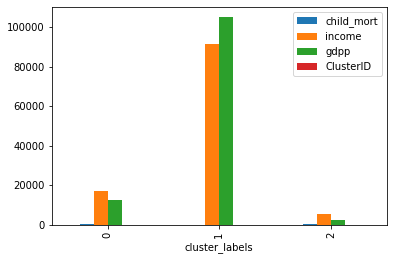

In [69]:
# plotting
data2.drop('country',axis=1).groupby('cluster_labels').mean().plot(kind='bar')

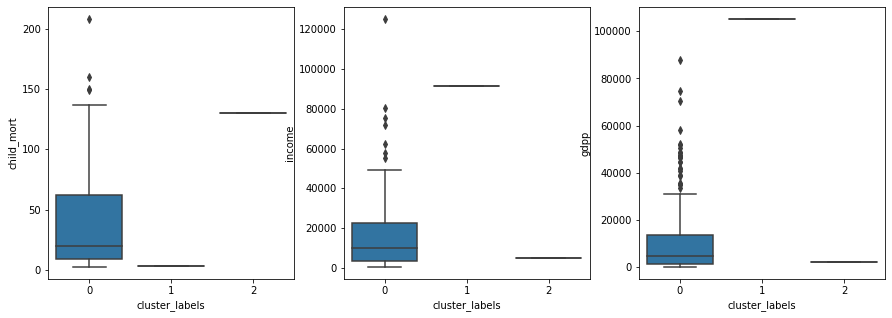

In [70]:
plt.figure(figsize=(15,5))
var=['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='cluster_labels',y=i[1],data=data2)

In [71]:
# Concept of binning
data2[data2['cluster_labels']==0]['country']

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
7                           Australia
8                             Austria
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
15                            Belgium
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26          